In [9]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
class Player:
    def __init__(self, name, curr_coins):
        self.curr_coins = curr_coins
        self.name = name
        
    def add_coins(self, no_of_coins):
        self.curr_coins += no_of_coins
      
    def deduct_coins(self, no_of_coins):
        if self.curr_coins < no_of_coins:
            return False
        self.curr_coins -= no_of_coins
    def print_current_status(self):
        print("Player", self.name, "Currently Have:", self.curr_coins, "Coins")
        
def action(player, pots):
    """Roll the dice and this player do an action
       - return False if this player lose (out of coins)
       - return True if this player still have coins
    """
    dice_rolled = random.randint(1, 6)
    if dice_rolled == 2:
        if pots.curr_coins > 0:
        #  Take all coins in the pots
            player.add_coins(pots.curr_coins)
            pots.deduct_coins(pots.curr_coins)

    elif dice_rolled == 3:
        if pots.curr_coins > 0:
        #   Take half coins in the pots
            coins_to_take = math.floor(pots.curr_coins/2)
            player.add_coins(coins_to_take)
            pots.deduct_coins(coins_to_take)

    elif dice_rolled in [4, 5 ,6]:
        player.deduct_coins(1)
        pots.add_coins(1)
        
    if player.curr_coins > 0:
        return True
    else:
        return False
    
def play_game(pots, player_A, player_B, max_cycles = 100):
    win_player = ""
    lost_player = ""
    for i in range(1, max_cycles+1):
        # A Turn
        # print("==================New rounds===================")
        # print("=== Player A Action ===")
        result_player_A = action(player_A, pots)
        if not result_player_A:
        #  print("Player A lost")
            win_player = player_B
            lost_player = player_A
            break
        # B Turn
        # print("=== Player B Action ===")
        result_player_B = action(player_B, pots)
        if not result_player_B:
        # print("Player B lost")
            win_player = player_A
            lost_player = player_B
            break
        
    return dict(win_player=win_player, lost_player=lost_player,rounds=i)

def round_cycles_games(rounds_to_play):
    round_list = []
    for i in range(1, rounds_to_play+1):  
        pots = Player("Pots", 2)
        player_A = Player("A", 4)
        player_B = Player("B", 4)
        result = play_game(pots, player_A, player_B, 300)
        round_list.append((result['rounds'], result['win_player'].name, result['win_player'].curr_coins))
    
    cycle_list = [i[0] for i in round_list]
    round_metrics = {'max':np.max(cycle_list), 
                     'min': np.min(cycle_list) ,
                     'avg': np.mean(cycle_list),
                     'p25': np.percentile(cycle_list, 25),
                     'p50': np.percentile(cycle_list, 50),
                     'p75': np.percentile(cycle_list, 75),
                     'winner_score': np.mean([i[2] for i in round_list]),
                     
                    }
    print(round_metrics)
    round_metrics['score_dist'] = cycle_list
    return round_metrics

def plot_hist(cycle_list, title=""):
    fig, ax = plt.subplots()
    ax.hist(cycle_list)
    ax.set_xlabel('Number of Cycles')
    ax.set_ylabel('Frequency')
    ax.set_title(title)
    plt.show(fig)

### Initial Run

{'max': 135, 'min': 4, 'avg': 11.864499, 'p25': 6.0, 'p50': 9.0, 'p75': 15.0, 'winner_score': 6.254837}


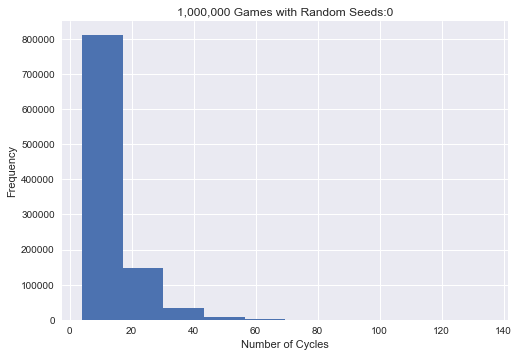

In [6]:
random.seed(0)
round_result = round_cycles_games(1000000)
round_result['random_seed'] = 0
plot_hist(round_result['score_dist'], f"1,000,000 Games with Random Seeds:0")

### Different Random Seed

SEED 4
{'max': 121, 'min': 4, 'avg': 11.849425, 'p25': 6.0, 'p50': 9.0, 'p75': 15.0, 'winner_score': 6.255434}


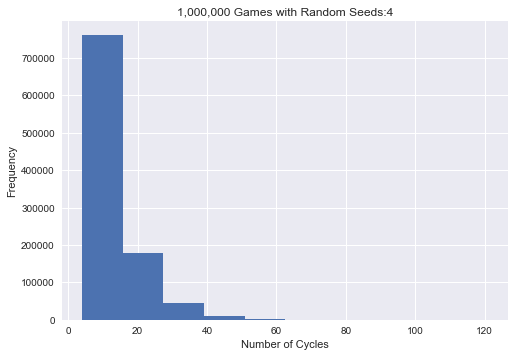

SEED 291
{'max': 123, 'min': 4, 'avg': 11.846212, 'p25': 6.0, 'p50': 9.0, 'p75': 15.0, 'winner_score': 6.255973}


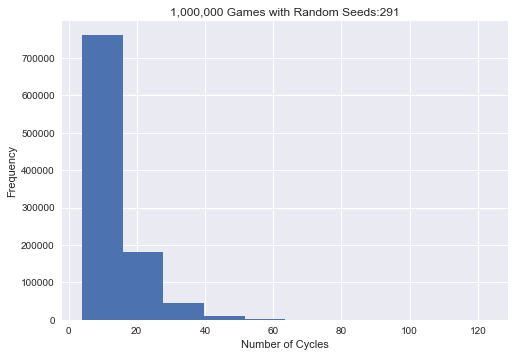

SEED 1041
{'max': 127, 'min': 4, 'avg': 11.865639, 'p25': 6.0, 'p50': 9.0, 'p75': 15.0, 'winner_score': 6.255878}


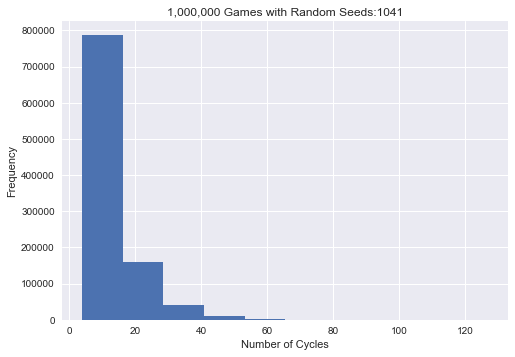

SEED 135867965
{'max': 130, 'min': 4, 'avg': 11.867475, 'p25': 6.0, 'p50': 9.0, 'p75': 15.0, 'winner_score': 6.25574}


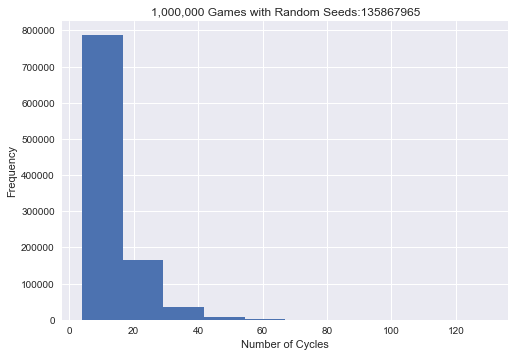

SEED 122722553
{'max': 115, 'min': 4, 'avg': 11.864763, 'p25': 6.0, 'p50': 9.0, 'p75': 15.0, 'winner_score': 6.255332}


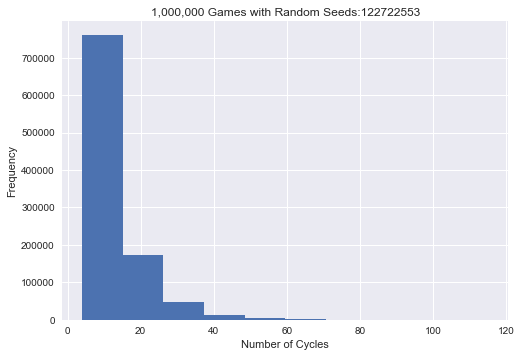

SEED 266498469
{'max': 129, 'min': 4, 'avg': 11.860605, 'p25': 6.0, 'p50': 9.0, 'p75': 15.0, 'winner_score': 6.252054}


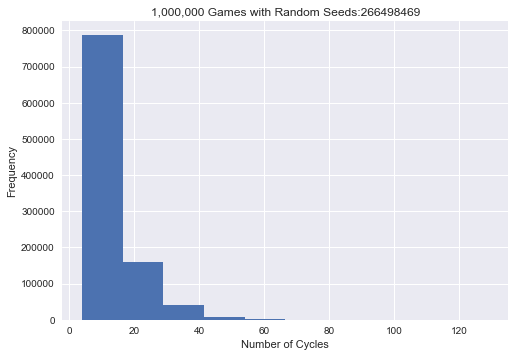

In [7]:
rand_seed_lists = [4, 291, 1041, 135867965, 122722553, 266498469] 
rounds_to_play = 1000000
result_lists = []
for i in rand_seed_lists:
    random.seed(i)
    print("SEED", i)
    round_result = round_cycles_games(rounds_to_play)
    round_result['random_seed'] = i
    result_lists.append(round_result)
    plot_hist(round_result['score_dist'], f"1,000,000 Games with Random Seeds:{i}")

### Different Number of Games Play

Rounds to Play 100
{'max': 36, 'min': 4, 'avg': 11.07, 'p25': 6.0, 'p50': 10.0, 'p75': 15.0, 'winner_score': 6.24}


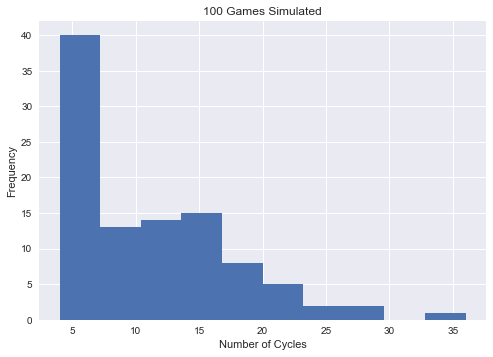

Rounds to Play 1000
{'max': 82, 'min': 4, 'avg': 12.178, 'p25': 6.0, 'p50': 9.0, 'p75': 15.0, 'winner_score': 6.286}


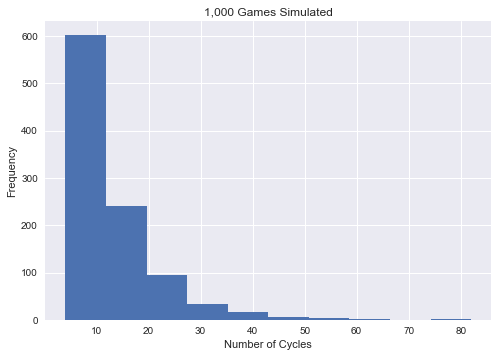

Rounds to Play 10000
{'max': 84, 'min': 4, 'avg': 11.9943, 'p25': 6.0, 'p50': 9.0, 'p75': 15.0, 'winner_score': 6.2951}


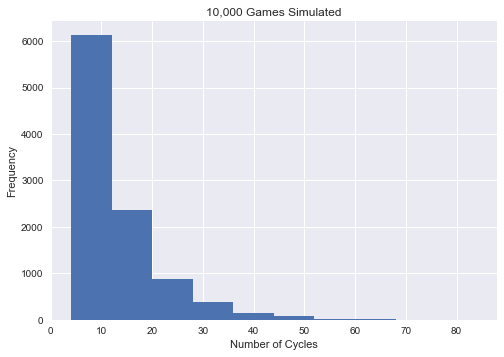

Rounds to Play 100000
{'max': 115, 'min': 4, 'avg': 11.87606, 'p25': 6.0, 'p50': 9.0, 'p75': 15.0, 'winner_score': 6.25635}


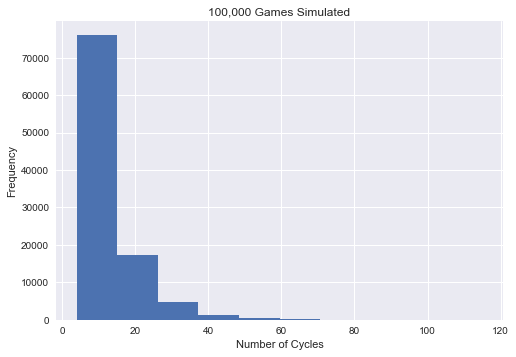

Rounds to Play 1000000
{'max': 135, 'min': 4, 'avg': 11.864499, 'p25': 6.0, 'p50': 9.0, 'p75': 15.0, 'winner_score': 6.254837}


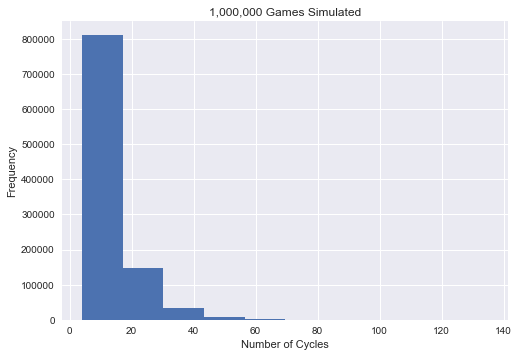

Rounds to Play 10000000
{'max': 143, 'min': 4, 'avg': 11.8533879, 'p25': 6.0, 'p50': 9.0, 'p75': 15.0, 'winner_score': 6.2531517}


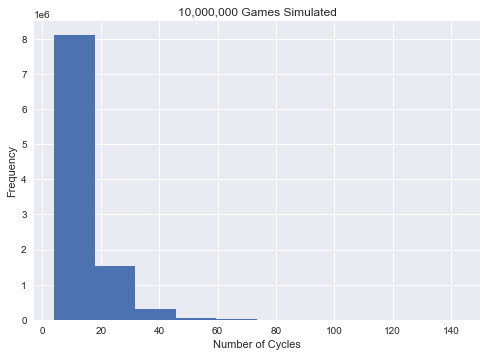

In [10]:
# rand_seed_lists = [4, 291, 1041, 135867965, 122722553, 266498469] 
rounds_to_play_lists = [100, 1000, 10000, 100000, 1000000, 10000000]
result_lists = []
for i in rounds_to_play_lists:
    random.seed(0)
    print("Rounds to Play", i)
    round_result = round_cycles_games(i)
    round_result['round_to_play'] = i
    result_lists.append(round_result)
    plot_hist(round_result['score_dist'], f"{i:,d} Games Simulated")